In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import os
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
# 1. Load Data
data_path = ("/Users/egeberk/Anaconda/Model/Input_Data/MasterData.csv")
Master = pd.read_csv(data_path)

# Optionally ensure Region is treated as a categorical variable
Master["Region"] = Master["Region"].astype("category")

In [3]:
Master

,Region,Year,Annual Mean Precipitation (mm),Annual Mean Temperature (°C),Glacier_Cover,Delta Area (ha),Log Delta Area,Scaled Temperature,Scaled Precipitation,Scaled Glacier Cover,Scaled Logged Delta Area
0,Alice_Arm,1983,194.248087,2.876533,0.048998,219.631033,2.341694,0.396445,-1.212931,-1.221495,-0.282796
1,Alice_Arm,1993,189.876915,3.448803,0.048998,266.938188,2.426411,0.781106,-1.293387,-1.221495,-0.024782
2,Alice_Arm,2003,224.229403,3.052826,0.048998,251.459698,2.400468,0.514944,-0.661099,-1.221495,-0.103792
3,Alice_Arm,2013,156.489942,3.299186,0.048998,250.166685,2.398229,0.680539,-1.907903,-1.221495,-0.110611
4,Chickamin,1983,285.353833,2.579081,0.183101,168.135848,2.225660,0.196508,0.463949,-0.661302,-0.636189
5,Chickamin,1993,289.997511,3.405939,0.183101,218.124388,2.338704,0.752295,0.549420,-0.661302,-0.291901
6,Chickamin,2003,334.011113,2.886743,0.183101,259.101631,2.413470,0.403309,1.359528,-0.661302,-0.064194
7,Chickamin,2013,250.959385,3.045230,0.183101,221.648777,2.345665,0.509838,-0.169111,-0.661302,-0.270700
8,Hastings,1983,264.784092,1.499874,0.321596,50.529052,1.703541,-0.528899,0.085345,-0.082759,-2.226359
9,Hastings,1993,254.881313,2.145328,0.321596,85.854392,1.933763,-0.095046,-0.096924,-0.082759,-1.525195


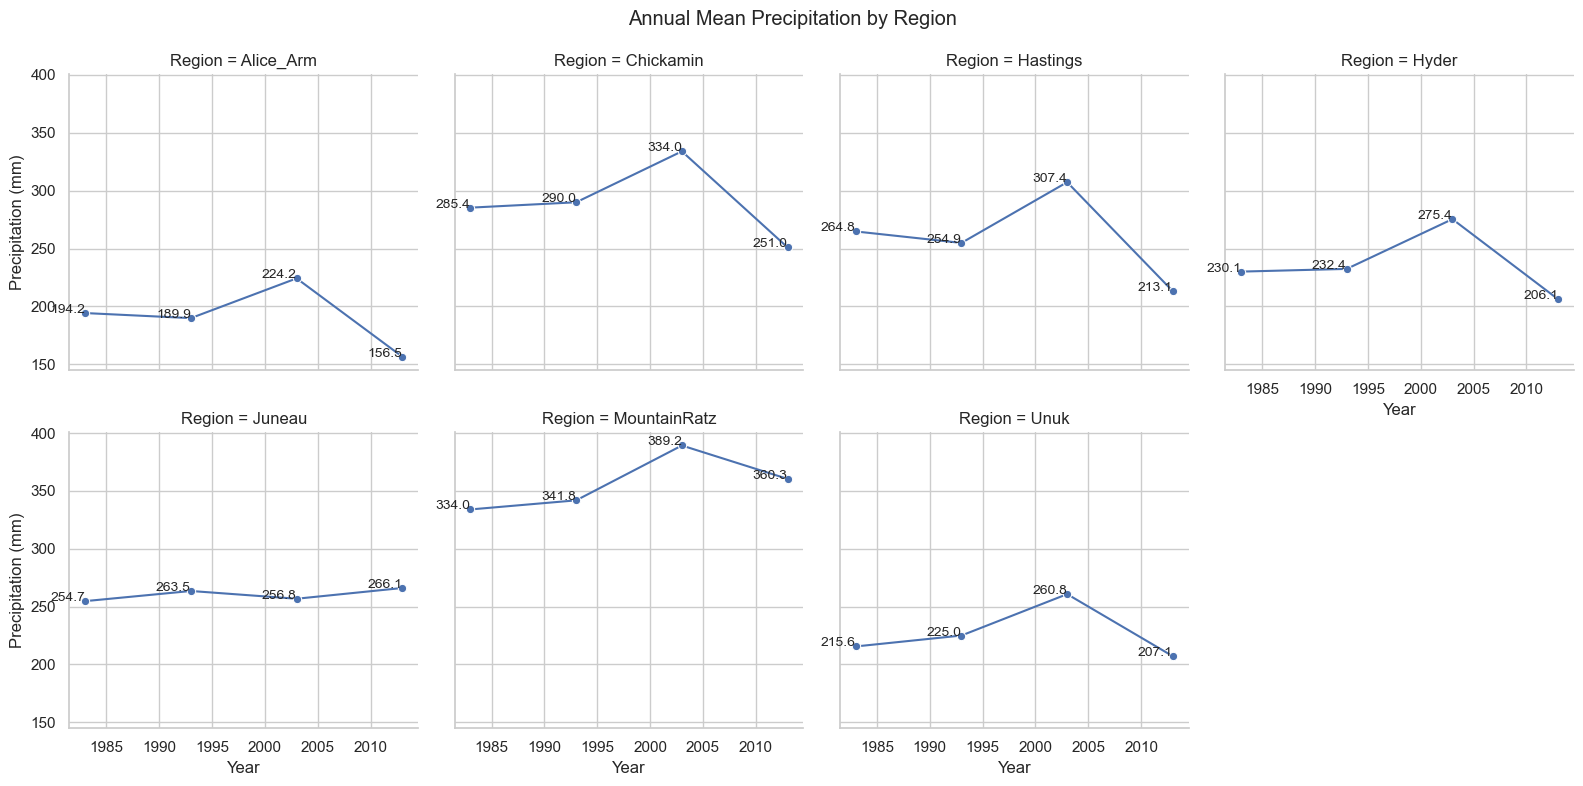

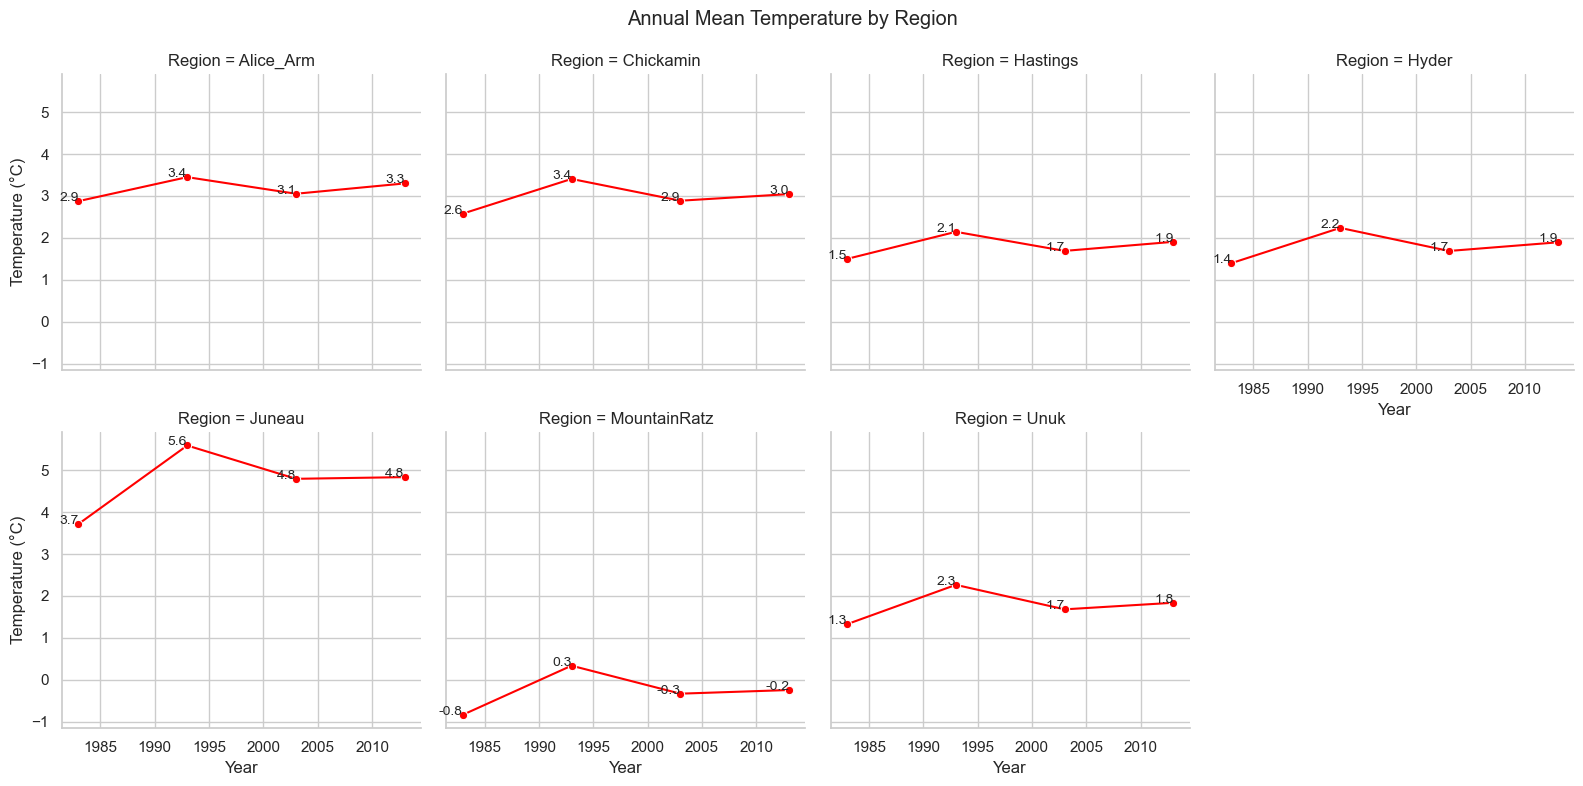

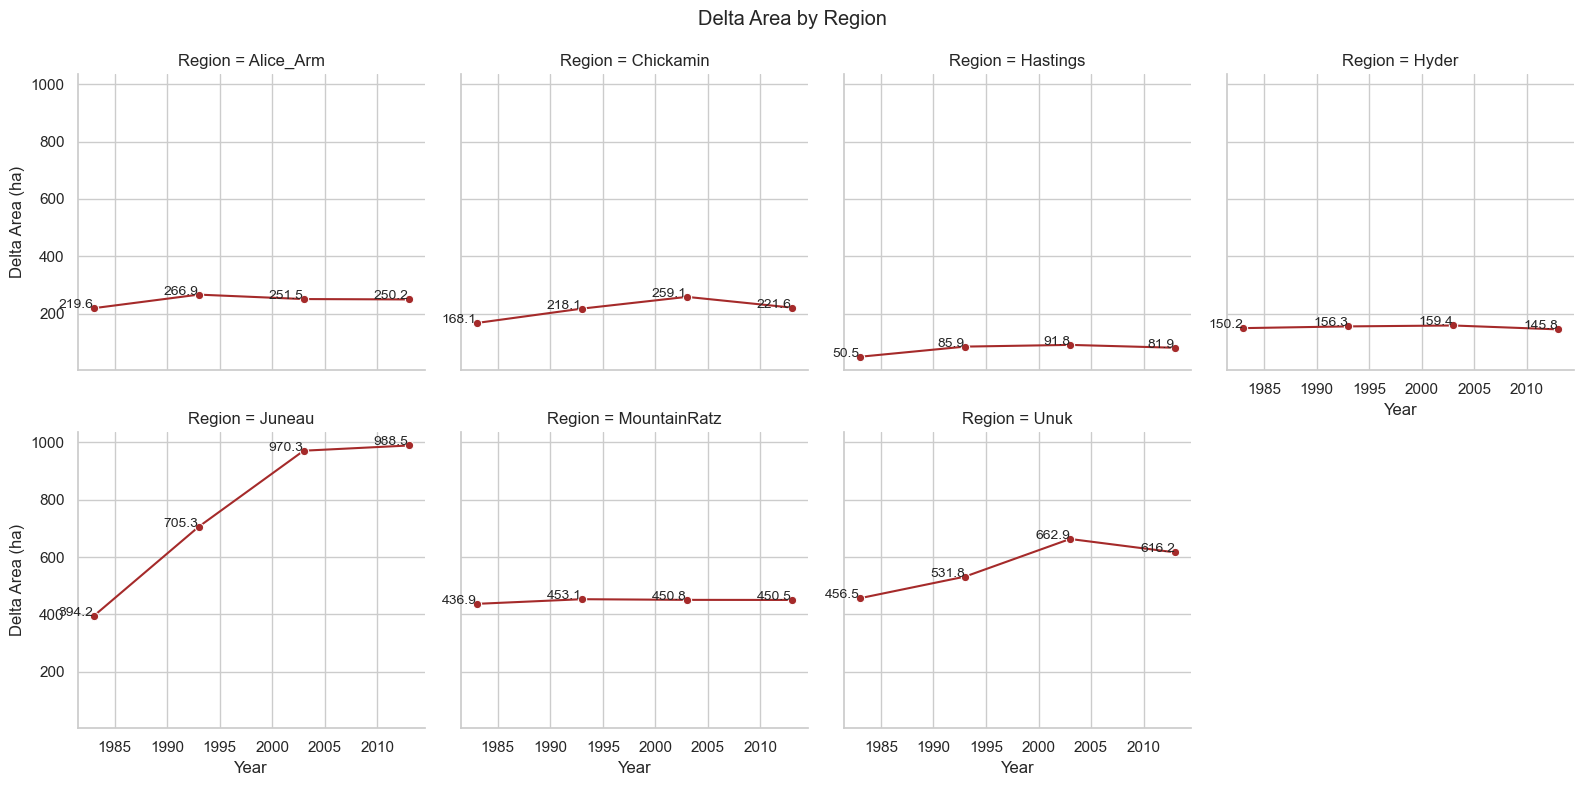

In [4]:
# Re-enable grid style globally
sns.set(style="whitegrid")

# Set save path
save_dir = "/Users/egeberk/Anaconda/Model/Output_Plots"
os.makedirs(save_dir, exist_ok=True)

# Define annotate_points before using it
def annotate_points(data, x, y, label, **kwargs):
    for i, row in data.iterrows():
        plt.text(row[x], row[y], str(row[label]), fontsize=10, ha='right')

# --- Precipitation Plot ---
Master["Precip_rounded"] = Master["Annual Mean Precipitation (mm)"].round(1)
g1 = sns.FacetGrid(Master, col="Region", col_wrap=4, height=4, sharex=True, sharey=True)
g1.map_dataframe(sns.lineplot, x="Year", y="Annual Mean Precipitation (mm)", marker="o")
g1.map_dataframe(annotate_points, x="Year", y="Annual Mean Precipitation (mm)", label="Precip_rounded")
g1.set_axis_labels("Year", "Precipitation (mm)")
g1.fig.subplots_adjust(top=0.9)
g1.fig.suptitle("Annual Mean Precipitation by Region")
for ax in g1.axes.flatten():
    ax.grid(True)
g1.savefig(os.path.join(save_dir, "precip_by_region.png"), dpi=300, bbox_inches="tight")
plt.show()

# --- Temperature Plot (Red) ---
Master["Temp_rounded"] = Master["Annual Mean Temperature (°C)"].round(1)
g2 = sns.FacetGrid(Master, col="Region", col_wrap=4, height=4, sharex=True, sharey=True)
g2.map_dataframe(sns.lineplot, x="Year", y="Annual Mean Temperature (°C)", marker="o", color="red")
g2.map_dataframe(annotate_points, x="Year", y="Annual Mean Temperature (°C)", label="Temp_rounded")
g2.set_axis_labels("Year", "Temperature (°C)")
g2.fig.subplots_adjust(top=0.9)
g2.fig.suptitle("Annual Mean Temperature by Region")
for ax in g2.axes.flatten():
    ax.grid(True)
g2.savefig(os.path.join(save_dir, "temperature_by_region.png"), dpi=300, bbox_inches="tight")
plt.show()

# --- Delta Area Plot (Brown) ---
Master["Delta_rounded"] = Master["Delta Area (ha)"].round(1)
g3 = sns.FacetGrid(Master, col="Region", col_wrap=4, height=4, sharex=True, sharey=True)
g3.map_dataframe(sns.lineplot, x="Year", y="Delta Area (ha)", marker="o", color="brown")
g3.map_dataframe(annotate_points, x="Year", y="Delta Area (ha)", label="Delta_rounded")
g3.set_axis_labels("Year", "Delta Area (ha)")
g3.fig.subplots_adjust(top=0.9)
g3.fig.suptitle("Delta Area by Region")
for ax in g3.axes.flatten():
    ax.grid(True)
g3.savefig(os.path.join(save_dir, "delta_area_by_region.png"), dpi=300, bbox_inches="tight")
plt.show()


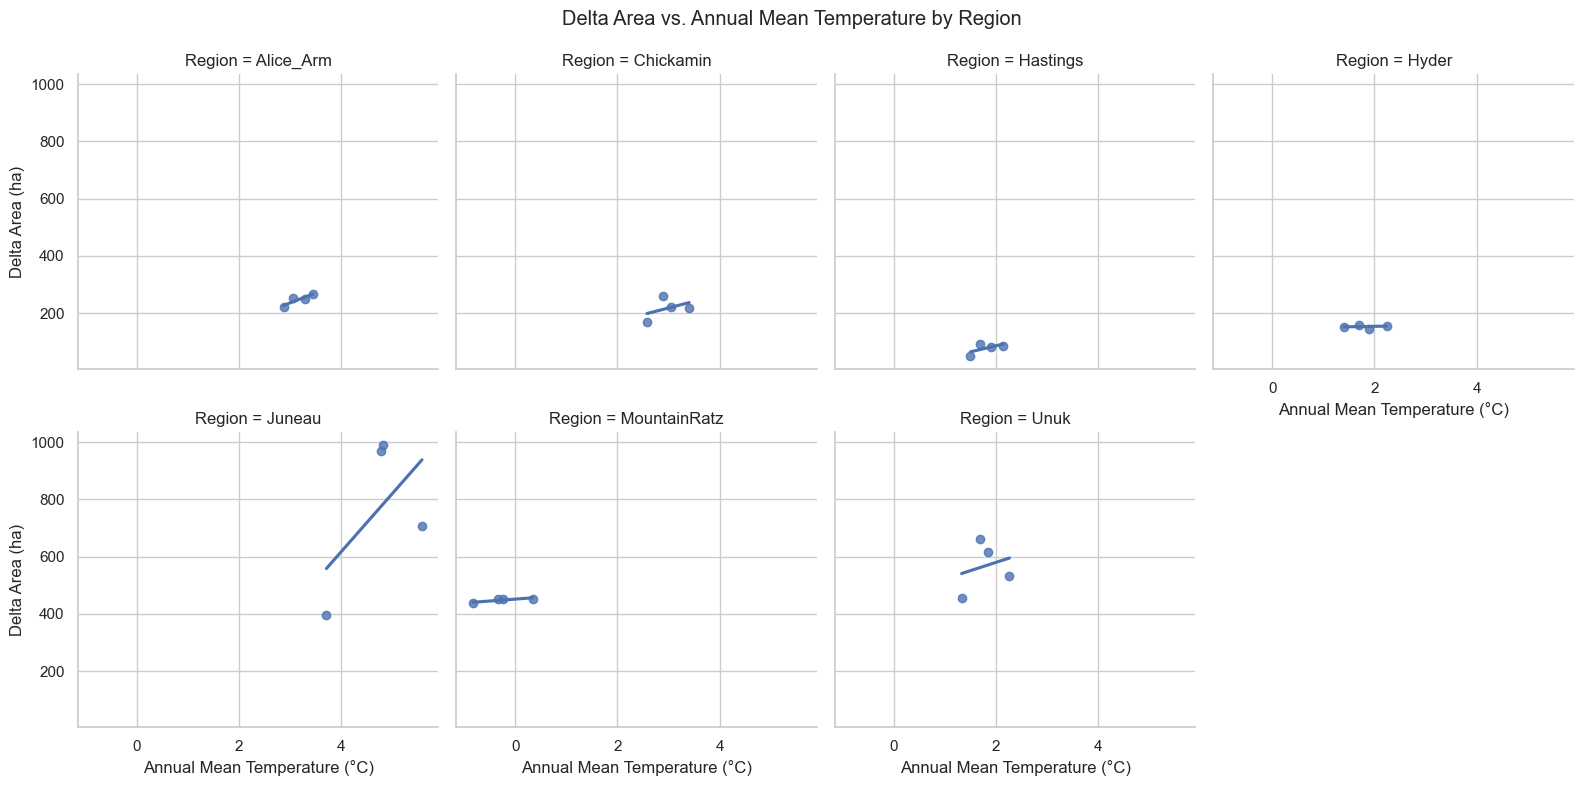

In [5]:
# 2. Exploratory Data Analysis: Faceted Scatter Plot with Regression Line
# Create a facet grid by 'Region' and map a regression plot on each facet.
g = sns.FacetGrid(Master, col="Region", col_wrap=4, height=4)
g.map_dataframe(sns.regplot,
                x="Annual Mean Temperature (°C)",
                y="Delta Area (ha)",
                scatter=True,
                ci=None)  # ci=None avoids plotting the confidence interval if desired
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Delta Area vs. Annual Mean Temperature by Region")
plt.show()

In [6]:
print(Master["Region"].value_counts())

Region
Alice_Arm       4
Chickamin       4
Hastings        4
Hyder           4
Juneau          4
MountainRatz    4
Unuk            4
Name: count, dtype: int64


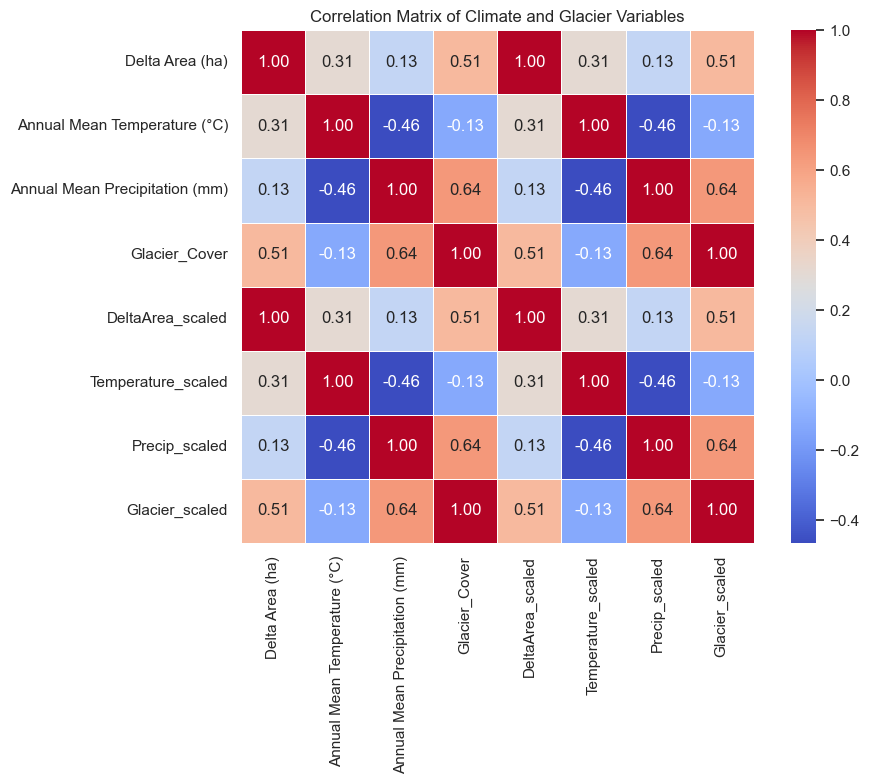

In [7]:
# 3. Standardize Variables
# We'll create new columns with standardized values similar to R's scale().
scaler_temp = StandardScaler()
scaler_delta = StandardScaler()
scaler_glacier = StandardScaler()
scaler_precip = StandardScaler()

# Standardize 'Delta Area (ha)' and 'Annual Mean Temperature (°C)'
Master["DeltaArea_scaled"] = scaler_delta.fit_transform(Master[["Delta Area (ha)"]])
Master["Temperature_scaled"] = scaler_temp.fit_transform(Master[["Annual Mean Temperature (°C)"]])
Master["Glacier_scaled"] = scaler_glacier.fit_transform(Master[["Glacier_Cover"]])

# The multilevel model includes precipitation, so scale it too.
Master["Precip_scaled"] = scaler_precip.fit_transform(Master[["Annual Mean Precipitation (mm)"]])

# 3.5 Correlation Matrix of Key Variables
corr_vars = [
    "Delta Area (ha)",
    "Annual Mean Temperature (°C)",
    "Annual Mean Precipitation (mm)",
    "Glacier_Cover",
    "DeltaArea_scaled",
    "Temperature_scaled",
    "Precip_scaled",
    "Glacier_scaled"
]

# Compute correlation matrix
corr_matrix = Master[corr_vars].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=0.5)
plt.title("Correlation Matrix of Climate and Glacier Variables")
plt.tight_layout()

# Save the heatmap
plt.savefig(os.path.join(save_dir, "correlation_matrix.png"), dpi=300, bbox_inches="tight")
plt.show()


In [8]:
# 4. Fit OLS Models and Compare

# 4.1 Fit OLS Model WITHOUT Interaction
ols_formula_simple = "DeltaArea_scaled ~ Temperature_scaled + Glacier_scaled + Precip_scaled"
mod0_simple = smf.ols(formula=ols_formula_simple, data=Master).fit()

print("\n=== OLS Model WITHOUT Interaction ===")
print(mod0_simple.summary())

# 4.2 Fit OLS Model WITH Interaction
ols_formula_interaction = "DeltaArea_scaled ~ Temperature_scaled * Glacier_scaled * Precip_scaled"
mod0_interaction = smf.ols(formula=ols_formula_interaction, data=Master).fit()

print("\n=== OLS Model WITH Interaction ===")
print(mod0_interaction.summary())

# 4.3 (Optional) Store Key Metrics for Comparison
model_comparison = pd.DataFrame({
    "Model": ["Without Interaction", "With Interaction"],
    "R-squared": [mod0_simple.rsquared, mod0_interaction.rsquared],
    "Adj. R-squared": [mod0_simple.rsquared_adj, mod0_interaction.rsquared_adj],
    "AIC": [mod0_simple.aic, mod0_interaction.aic],
    "BIC": [mod0_simple.bic, mod0_interaction.bic]
})

print("\n=== Model Comparison ===")
print(model_comparison)

##Run models with interactive terms by using multiplication sign, check the interaction.Y = w_0 + w1_x1 + w_2 x_2 + w_3 (x_1 * x_2) Clews Tip tricks linear models. Check placement is so importnant_ =in general no=
#Also use the old version to have the comparison in both models. Explain the models in detail instead of having more data points.
#Discuss about the sediment fluxes and effect on the model.


=== OLS Model WITHOUT Interaction ===
                            OLS Regression Results                            
Dep. Variable:       DeltaArea_scaled   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     5.377
Date:                Wed, 07 May 2025   Prob (F-statistic):            0.00564
Time:                        09:26:21   Log-Likelihood:                -32.533
No. Observations:                  28   AIC:                             73.07
Df Residuals:                      24   BIC:                             78.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [9]:
# 5. Fit a Multi-Level (Mixed-Effects) Model (Mod1)
# The R model has fixed effects for Temperature, Precipitation, and Glacier cover,
# and random slopes for Temperature and Precipitation across Regions.

# Create fixed effect design matrix (automatically includes an intercept)
exog = sm.add_constant(Master[["Temperature_scaled", "Precip_scaled", "Glacier_scaled"]])
endog = Master["DeltaArea_scaled"]

# Specify the random effects design matrix:
# Here we allow both Temperature and Precipitation slopes to vary by Region.
exog_re = Master[["Temperature_scaled", "Precip_scaled"]]

# Fit the mixed model using Region as the grouping variable.
mod1 = MixedLM(endog, exog, groups=Master["Region"], exog_re=exog_re)
mixed_model = mod1.fit()
print("\nMixed-Effects Model Summary:")
print(mixed_model.summary())


Mixed-Effects Model Summary:
                      Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       DeltaArea_scaled
No. Observations:        28            Method:                   REML            
No. Groups:              7             Scale:                    0.2896          
Min. group size:         4             Log-Likelihood:           -29.9748        
Max. group size:         4             Converged:                Yes             
Mean group size:         4.0                                                     
---------------------------------------------------------------------------------
                                       Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------------------------
const                                  -0.375    0.223 -1.684 0.092 -0.812  0.062
Temperature_scaled                      0.138    0.507  0.272 0.785 -0.855  1.131
Precip_s

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


In [10]:
# 6. Extract Fixed and Random Effects
fixed_effects = mixed_model.fe_params
print("\nFixed Effects:")
print(fixed_effects)

random_effects = mixed_model.random_effects
print("\nRandom Effects by Region:")
for region, params in random_effects.items():
    print(f"Region: {region}")
    print(params)



Fixed Effects:
const                -0.375265
Temperature_scaled    0.137942
Precip_scaled         0.069871
Glacier_scaled       -0.014851
dtype: float64

Random Effects by Region:
Region: Alice_Arm
Temperature_scaled   -0.079793
Precip_scaled        -0.021056
dtype: float64
Region: Chickamin
Temperature_scaled   -0.343505
Precip_scaled        -0.090658
dtype: float64
Region: Hastings
Temperature_scaled    1.220400
Precip_scaled         0.322082
dtype: float64
Region: Hyder
Temperature_scaled    0.526891
Precip_scaled         0.139058
dtype: float64
Region: Juneau
Temperature_scaled    1.082845
Precip_scaled         0.285784
dtype: float64
Region: MountainRatz
Temperature_scaled   -0.657327
Precip_scaled        -0.173473
dtype: float64
Region: Unuk
Temperature_scaled   -1.749510
Precip_scaled        -0.461737
dtype: float64


In [11]:
# After fitting the OLS model (mod0_simple) and printing its summary:
coef = mod0_simple.params

# Create the regression equation as a string
model_equation = (
    f"DeltaArea_scaled = {coef['Intercept']:.3f} "
    f"+ ({coef['Temperature_scaled']:.3f})*Temperature_scaled "
    f"+ ({coef['Glacier_scaled']:.3f})*Glacier_scaled"
    f"+ ({coef['Precip_scaled']:.3f})*Precip_scaled"
)

print("Fitted Model Equation:")
print(model_equation)

# After fitting the OLS model (mod0_interaction) and printing its summary:
coef = mod0_interaction.params

# Create the regression equation as a string
model_equation = (
    f"DeltaArea_scaled = {coef['Intercept']:.3f} "
    f"+ ({coef['Temperature_scaled']:.3f})*Temperature_scaled "
    f"+ ({coef['Glacier_scaled']:.3f})*Glacier_scaled"
    f"+ ({coef['Precip_scaled']:.3f})*Precip_scaled"
)

print("Fitted Model Equation:")
print(model_equation)


Fitted Model Equation:
DeltaArea_scaled = 0.000 + (0.340)*Temperature_scaled + (0.614)*Glacier_scaled+ (-0.102)*Precip_scaled
Fitted Model Equation:
DeltaArea_scaled = -0.444 + (0.322)*Temperature_scaled + (-0.029)*Glacier_scaled+ (0.120)*Precip_scaled


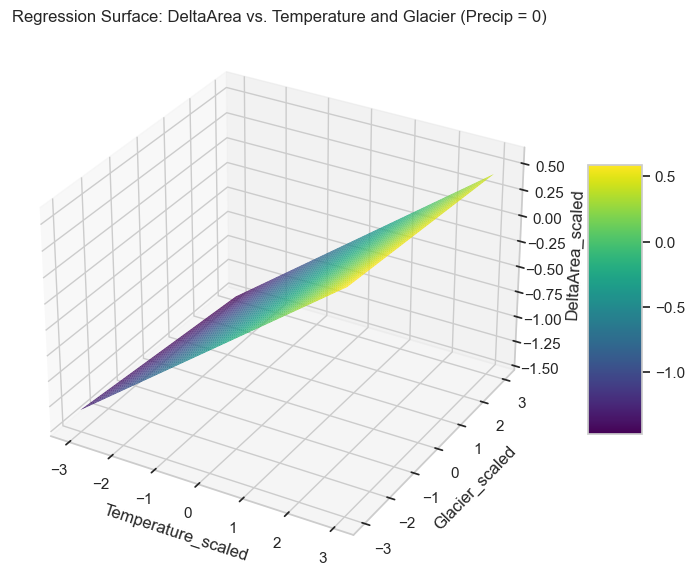

In [12]:
# Fitted model parameters
intercept = coef['Intercept']
coef_temp = coef['Temperature_scaled']
coef_glacier = coef['Glacier_scaled']
coef_precip = coef['Precip_scaled']

# Create a grid for Temperature and Glacier values
temp_values = np.linspace(-3, 3, 50)
glacier_values = np.linspace(-3, 3, 50)
Temp, Glacier = np.meshgrid(temp_values, glacier_values)

# Fix Precip_scaled at 0 (its average after standardization)
Precip = 0

# Compute predicted DeltaArea_scaled on the grid
predicted_delta = intercept + coef_temp * Temp + coef_glacier * Glacier + coef_precip * Precip

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(Temp, Glacier, predicted_delta, cmap='viridis', edgecolor='none')
ax.set_xlabel('Temperature_scaled')
ax.set_ylabel('Glacier_scaled')
ax.set_zlabel('DeltaArea_scaled')
ax.set_title('Regression Surface: DeltaArea vs. Temperature and Glacier (Precip = 0)')
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=5)
plt.show()
fig.savefig(os.path.join(save_dir, "3D_regression_surface.png"), dpi=300, bbox_inches="tight")

